In [1]:
%matplotlib notebook

In [2]:
import os,glob
import warnings
warnings.simplefilter("ignore")
# here find the sample file name and path
# also load experiment setup
path = os.getcwd()
os.chdir(path)
fn = glob.glob('*.tif')[0]

image_x0 = 715.09
image_y0 = 941.08
wavelength = 1.24
std = 2.03
pixel_size = 172

In [3]:
from im_load import load_tiff
# load tif image
img = load_tiff(fn).im

In [4]:
from exp_param import ExpConfig
# input experiment parameters and calculate correlated coefficients
dexp = ExpConfig(im_x=img.shape[1],
                 im_y=img.shape[0],
                center_x=image_x0,
                center_y=image_y0,
                wavelength=wavelength,
                pixel_size=pixel_size,
                detector_distance=std,
                )

In [5]:
from data_reduction import proc
import numpy as np
# process the data with coefficients determined above
d = proc(img,dexp)
q = np.linspace(0.001,0.2,300)
# reduce 2D data 1D intensity profile
d1d = d.data1d(q)

In [6]:
from data_visual import data_show
# display image and processed data
show = data_show(d,dexp)

<IPython.core.display.Javascript object>


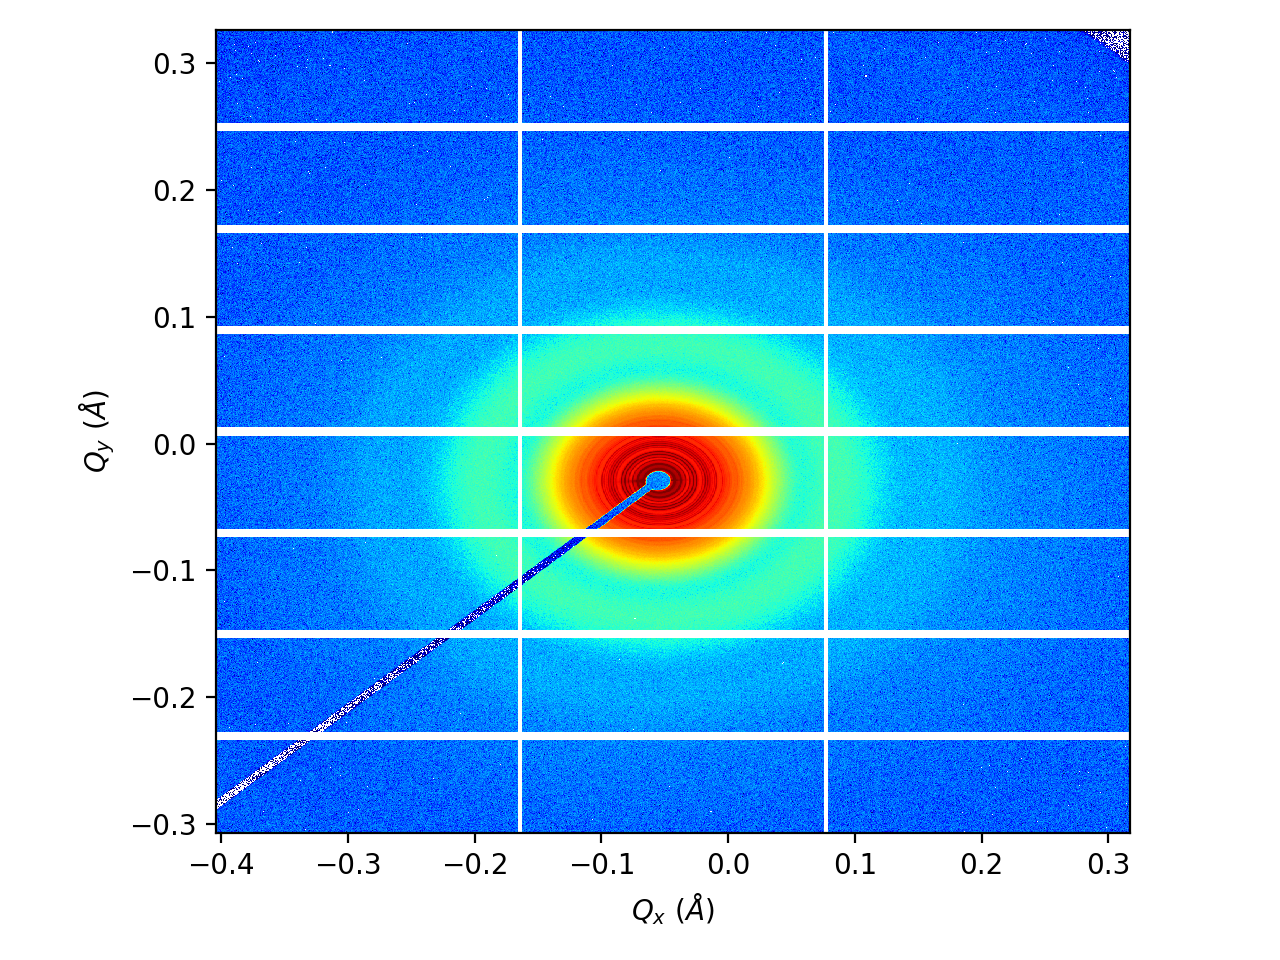

In [7]:
# show 2D tiff image
show.show2D(vmax=10000)

<IPython.core.display.Javascript object>


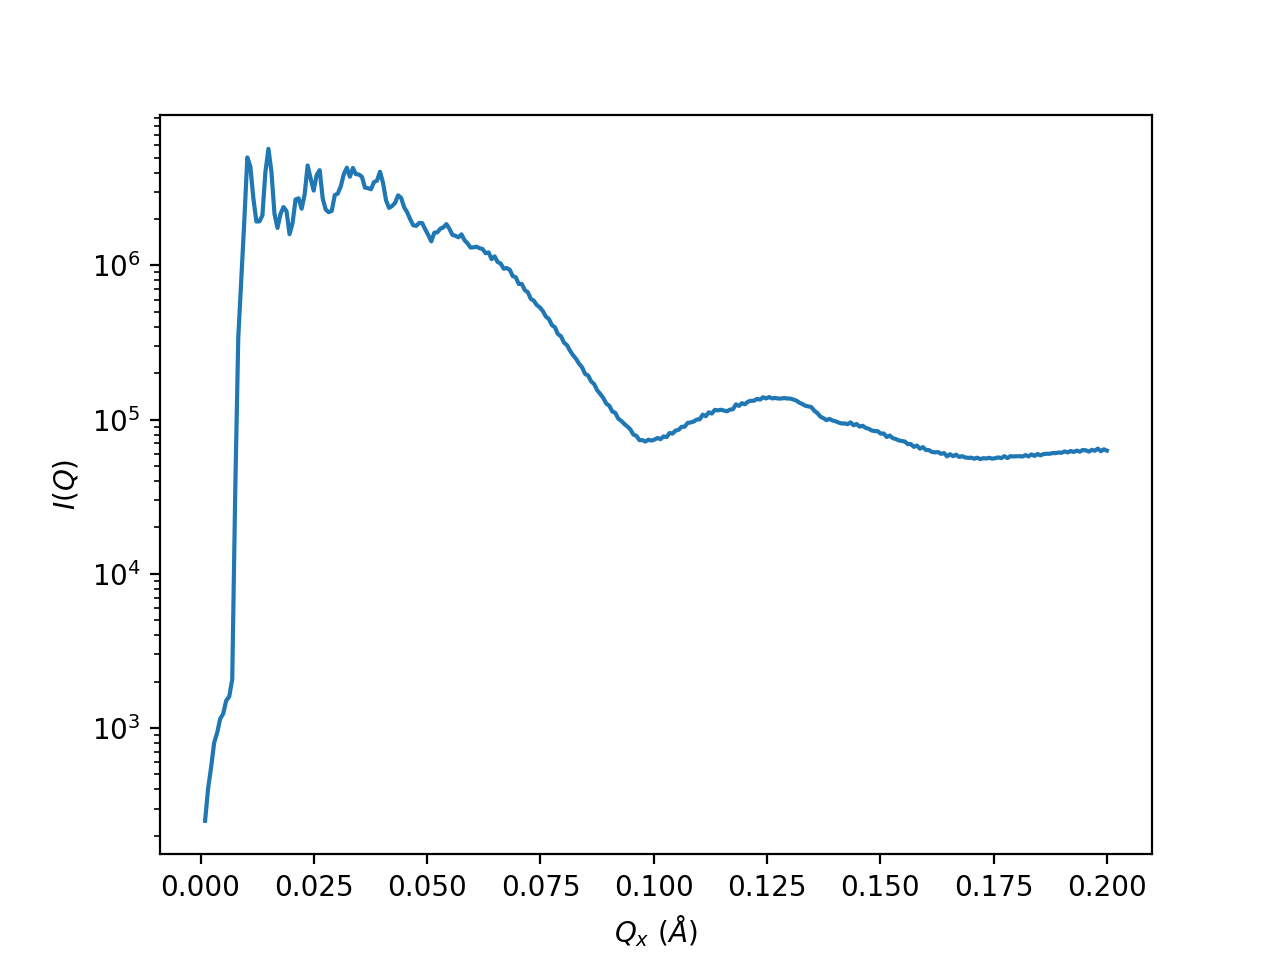

In [8]:
# display processed 1D intensity profile
show.show1D(q)